In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr

df = pd.read_csv('compare.csv')

df['correct'] = (df['similarity_score'] - df['gemini_score']).abs() <= 2

total = len(df)
correct_count = df['correct'].sum()
percent_correct = correct_count / total * 100

print(f'Totale record        : {total}')
print(f'Record corretti      : {correct_count}')
print(f'Percentuale corretti : {percent_correct:.1f}%')


Totale record        : 730
Record corretti      : 547
Percentuale corretti : 74.9%


In [31]:
y_true = df['gemini_score']
y_pred = df['similarity_score']

mae   = mean_absolute_error(y_true, y_pred)
mse   = mean_squared_error(y_true, y_pred)
rmse  = mse ** 0.5
r2    = r2_score(y_true, y_pred)

pearson_corr, pearson_p = pearsonr(y_true, y_pred)
spearman_corr, spearman_p = spearmanr(y_true, y_pred)

within_1 = ((y_true - y_pred).abs() <= 1).mean() * 100

print(f"MAE                : {mae:.3f}")
print(f"MSE                : {mse:.3f}")
print(f"RMSE               : {rmse:.3f}")
print(f"R²                 : {r2:.3f}")
print(f"Pearson corr       : {pearson_corr:.3f} (p={pearson_p:.3g})")
print(f"Spearman corr      : {spearman_corr:.3f} (p={spearman_p:.3g})")
print(f"% entro ±1 punto   : {within_1:.1f}%")

MAE                : 1.660
MSE                : 4.208
RMSE               : 2.051
R²                 : 0.286
Pearson corr       : 0.631 (p=3.44e-82)
Spearman corr      : 0.648 (p=3.06e-88)
% entro ±1 punto   : 51.1%


Coefficiente di correlazione: 0.631


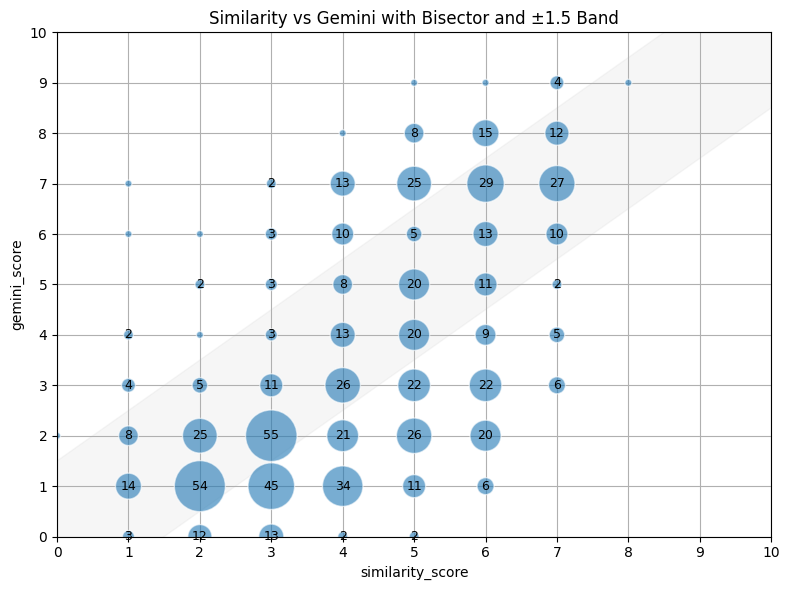

In [32]:
# Group by score pairs and count occurrences
grouped = df.groupby(['similarity_score', 'gemini_score']).size().reset_index(name='counts')

# Compute correlation coefficient
corr_coef = df['similarity_score'].corr(df['gemini_score'])
print(f'Coefficiente di correlazione: {corr_coef:.3f}')

# Bisector and ±1.5 band (shaded background)
x_vals = range(0, 11)
y_lower = [x - 1.5 for x in x_vals]
y_upper = [x + 1.5 for x in x_vals]

plt.figure(figsize=(8, 6))

# Shaded tolerance band
plt.fill_between(x_vals, y_lower, y_upper,
                 alpha=0.2, color='lightgrey', zorder=1)

# Scatter plot (circle size based on frequency)
plt.scatter(
    grouped['similarity_score'],
    grouped['gemini_score'],
    s=grouped['counts'] * 25,
    alpha=0.6,
    edgecolors='w',
    zorder=2
)

# Add count labels (only if > 1)
for _, row in grouped.iterrows():
    if row['counts'] > 1:
        plt.text(row['similarity_score'],
                 row['gemini_score'],
                 int(row['counts']),
                 fontsize=9, ha='center', va='center',
                 zorder=3)

# Axis limits and ticks
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))

plt.xlabel('similarity_score')
plt.ylabel('gemini_score')
plt.title('Similarity vs Gemini with Bisector and ±1.5 Band')
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()

Coefficiente di correlazione: 0.631


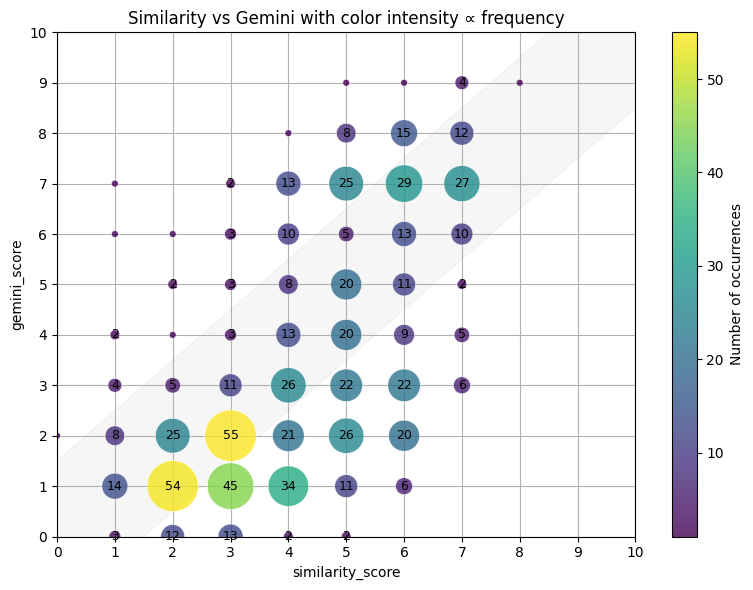

In [33]:
grouped = df.groupby(['similarity_score', 'gemini_score']) \
            .size().reset_index(name='counts')

# Compute correlation coefficient
corr_coef = df['similarity_score'].corr(df['gemini_score'])
print(f'Coefficiente di correlazione: {corr_coef:.3f}')

# Prepare bisector band (±1.5)
x_vals = range(0, 11)
y_lower = [x - 1.5 for x in x_vals]
y_upper = [x + 1.5 for x in x_vals]

plt.figure(figsize=(8, 6))

# Background tolerance band
plt.fill_between(x_vals, y_lower, y_upper,
                 alpha=0.2, color='lightgrey', zorder=1)

# Scatter plot with color mapped to frequency
sc = plt.scatter(
    grouped['similarity_score'],
    grouped['gemini_score'],
    s=grouped['counts'] * 25,
    c=grouped['counts'],
    cmap='viridis',
    alpha=0.8,
    edgecolors='w',
    linewidth=0.5,
    zorder=2
)

# Colorbar to interpret frequencies
cbar = plt.colorbar(sc)
cbar.set_label('Number of occurrences')

# Add count labels for points with more than 1 occurrence
for _, row in grouped.iterrows():
    if row['counts'] > 1:
        plt.text(row['similarity_score'],
                 row['gemini_score'],
                 int(row['counts']),
                 fontsize=9, ha='center', va='center', zorder=3)

# Axis settings
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))

plt.xlabel('similarity_score')
plt.ylabel('gemini_score')
plt.title('Similarity vs Gemini with color intensity ∝ frequency')
plt.grid(True, zorder=0)
plt.tight_layout()
plt.show()